## Aerofit Business Case Study

Aerofit is a leading fitness company in the field of fitness equipments. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people. 

#### Business Problem::

The market research team at the company wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each treadmill product by developing appropriate tables and charts.

2. For each treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Product Portfolio:**

* The KP281 is an entry-level treadmill that sells for \\$ 1,500.
* The KP481 is for mid-level runners that sell for \\$ 1,750.
* The KP781 treadmill is having advanced features that sell for \\$ 2,500.

#### Installing necessary libraries for the analysis

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset.

In [3]:
df = pd.read_csv("aerofit_treadmill.txt",delimiter=',')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


##### Basic exploration of the dataset

In [4]:
df.shape

(180, 9)

The Shape of the dataset is 180 X 9. It has 180 records with 9 different features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The features Product, Gender and MaritalStatus are of string data type and the rest of the other features are of integer data type

In [6]:
df.describe()  #This includes only the numerical features of the dataset.

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Describing the dataset with all the other features.

In [7]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Checking for the Null values in each of the feature of the dataset

In [8]:
df.columns  #The Individual features of the dataset

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [9]:
for cols in df.columns:
    print(cols +' =====> '+ str(df[cols].isna().sum()))

Product =====> 0
Age =====> 0
Gender =====> 0
Education =====> 0
MaritalStatus =====> 0
Usage =====> 0
Fitness =====> 0
Income =====> 0
Miles =====> 0


This dataset do not have any features with missing values. It is clean and feasible for analysis

In [10]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Check for frequency of different data points in the different features of the dataset.

In [11]:
for cols in df.columns:
    print('Column :: {}'.format(cols))
    print(df[cols].value_counts(),'\n')

Column :: Product
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64 

Column :: Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64 

Column :: Gender
Male      104
Female     76
Name: Gender, dtype: int64 

Column :: Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64 

Column :: MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64 

Column :: Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64 

Column :: Fitness
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64 

Column :: Income
45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
682

Number of unique values in the features of the dataset

In [12]:
for cols in df.columns:
    print(cols + '  ===>  ' + str(df[cols].nunique()))

Product  ===>  3
Age  ===>  32
Gender  ===>  2
Education  ===>  8
MaritalStatus  ===>  2
Usage  ===>  6
Fitness  ===>  5
Income  ===>  62
Miles  ===>  37


Unique values for each of the feature

In [13]:
for cols in df.columns:
    print(cols + '::')
    print(str(df[cols].unique()) + '\n')

Product::
['KP281' 'KP481' 'KP781']

Age::
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Gender::
['Male' 'Female']

Education::
[14 15 12 13 16 18 20 21]

MaritalStatus::
['Single' 'Partnered']

Usage::
[3 2 4 5 6 7]

Fitness::
[4 3 2 1 5]

Income::
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Miles::
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]



#### Detecting the Outliers in the dataset

We can detect the outliers in the numerical features of the dataset.

In [14]:
num_cols = []
for cols in df.columns:
    if df[cols].dtype=='int64':
        num_cols.append(cols)

In [15]:
num_cols

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

Age Feature

In [16]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

From the above we can see other statistical measures like 25th percentile value is 24.00 which means about 25% of the people are less than equal to the age of 24. 50th percentile value is mentioned as 26 which means about 50% of the people are of age less than or equal to 26. 75th percentile value is mentioned as 33 which means about 75% of the people are of age less than or equal to 33.

##### Is there any outliers present in this feature?

Initially to check this, we can compare the mean and median calculated from the feature and if both are similar then we can say that there are no outliers in the feature.

If there is a significant difference between them, then we can say that there has been some influence due to the outliers.

In [17]:
df['Age'].mean()   #Mean of the Age feature in the dataset

28.788888888888888

In [18]:
df['Age'].median()  #Median of the Age feature in the dataset.

26.0

We can see there is some difference between the mean and median. Lets continue to explore the outlier age's in the feature using boxplot

<Axes: >

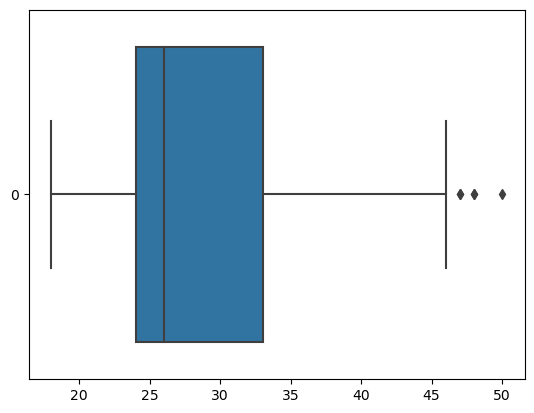

In [19]:
sns.boxplot(df['Age'],orient='h')

From the plot, we can say there are 3 outliers present beyond the upper range defined in the dataset. Lets separate those data points.

In [20]:
ap25 = np.percentile(df['Age'],25)    #It gives the 25th percentile value from the feature
ap50 = np.percentile(df['Age'],50)    #It gives the 50th percentile value from the feature
ap75 = np.percentile(df['Age'],75)    #It gives the 75th percentile value from the feature
aIQR = ap75 - ap25      #This gives the Inter-Quartile range of the feature.

In [21]:
print(ap25,ap50,ap75,aIQR)

24.0 26.0 33.0 9.0


From the IQR calculated above, We can calculate the lower and upper bounds defined by the Whiskers of the boxplot

In [22]:
lower = max(ap25-(1.5*aIQR),0)    #As age cannot be in negative, we are defining the lower bound as 0
upper = ap75 + (1.5*aIQR)    #Upper bound is 1.5 times the IQR greater than the 75th percentile value.
print(lower,upper)

10.5 46.5


Any data point beyond the lower and upper values are called as the outliers. So people with age greater than 46.5 years are outliers.

In [23]:
df.loc[df['Age']>upper]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


These are the 5 members who are of age greater than 46.5

Similarly we can find the outliers of all the numerical features in the dataset

In [24]:
for cols in num_cols:
    if cols=='Age':
        pass
    else:
        print(cols + ' ====> ' + 'Mean is {} and Median is {}'.format(df[cols].mean(),df[cols].median()))

Education ====> Mean is 15.572222222222223 and Median is 16.0
Usage ====> Mean is 3.4555555555555557 and Median is 3.0
Fitness ====> Mean is 3.311111111111111 and Median is 3.0
Income ====> Mean is 53719.57777777778 and Median is 50596.5
Miles ====> Mean is 103.19444444444444 and Median is 94.0


There are some outliers in each of the feature in the dataset. We can find them in the boxplots below

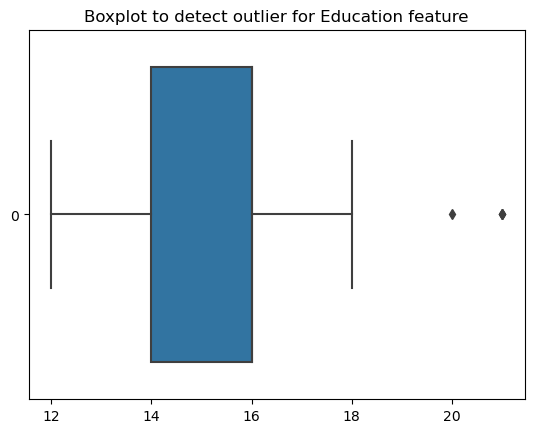

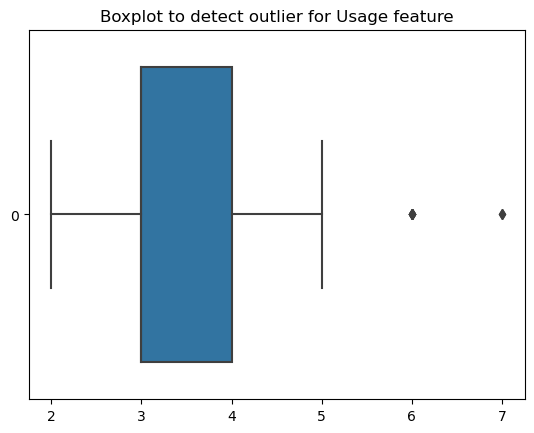

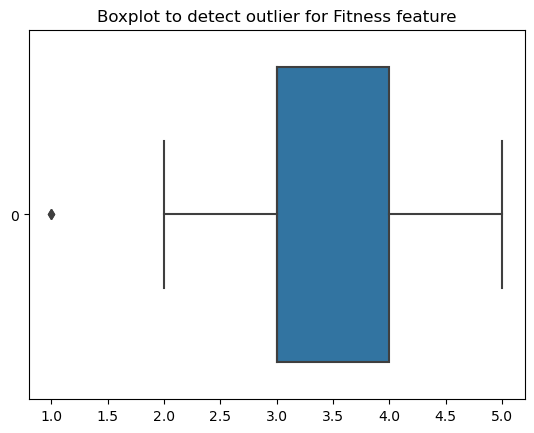

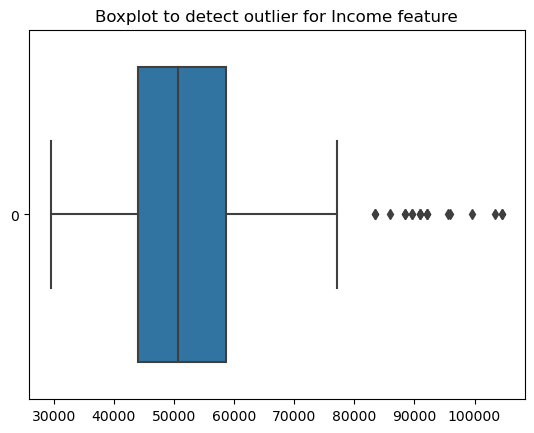

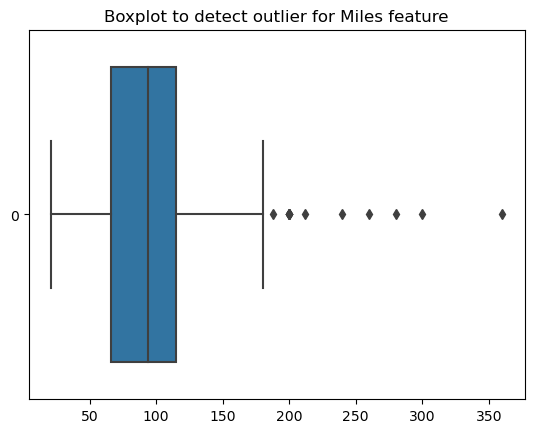

In [25]:
for cols in num_cols:
    if cols == 'Age':
        pass
    else:
        plt.figure()
        plt.title('Boxplot to detect outlier for {} feature'.format(cols))
        sns.boxplot(data=df[cols],orient='h')
        plt.show()

In [26]:
def findOutliers(cols):
    pe25 = df[cols].quantile(0.25)
    pe50 = df[cols].quantile(0.5)
    pe75 = df[cols].quantile(0.75)
    IQR = pe75 - pe25
    lower = max(0,pe25 - (1.5*IQR))
    upper = pe75 + (1.5*IQR)
    outliers = df.loc[(df[cols] > upper) | (df[cols] < lower)][cols].unique()
    return list(outliers)

In [27]:
outlier_vals = {}
for col in num_cols:
    outlier_vals[col] = findOutliers(col)

In [28]:
outlier_vals

{'Age': [47, 50, 48],
 'Education': [20, 21],
 'Usage': [6, 7],
 'Fitness': [1],
 'Income': [83416,
  88396,
  90886,
  92131,
  85906,
  103336,
  99601,
  89641,
  95866,
  104581,
  95508],
 'Miles': [188, 212, 200, 240, 300, 280, 260, 360]}

From the above we can see the unique outlier values of each of the feature in the dataset

##### Percentage of Outlier values in the features of the dataset.

In [29]:
def findPercent(cols):
    outlen = len(df.loc[df[cols].isin(outlier_vals[cols])])
    return (outlen/(len(df)))*100

In [30]:
outlier_percent = {}
for cols in num_cols:
    outlier_percent[cols] = findPercent(cols)

In [31]:
outlier_percent

{'Age': 2.7777777777777777,
 'Education': 2.2222222222222223,
 'Usage': 5.0,
 'Fitness': 1.1111111111111112,
 'Income': 10.555555555555555,
 'Miles': 7.222222222222221}

So from above we can see the percentage of outliers present in each of the features in the dataset.


#### Influence of the features on product purchased.

In [32]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


###### Influence of Marital status on the product

<Axes: xlabel='Product', ylabel='count'>

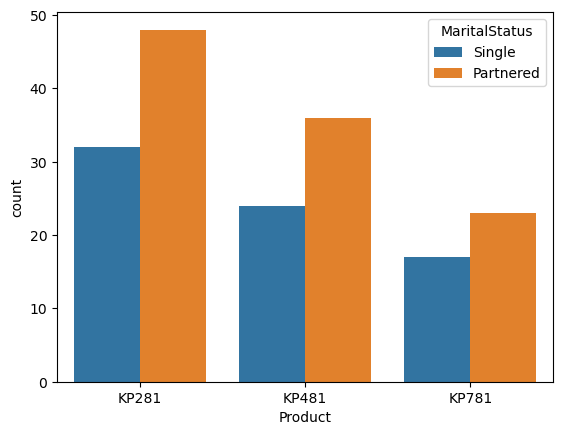

In [33]:
sns.countplot(data = df,x='Product',hue='MaritalStatus')

When it comes to single people, from the above plot we can see that most of the members have bought **KP281** product and the same goes with the Married people also.

In both categories of people, it can be seen that **KP281** is the most bought product.

Compared to people who are single, Married people show some extra interest towards the Aerofit's product.

##### Influence of Age on the Product bought

<Axes: xlabel='Product', ylabel='Age'>

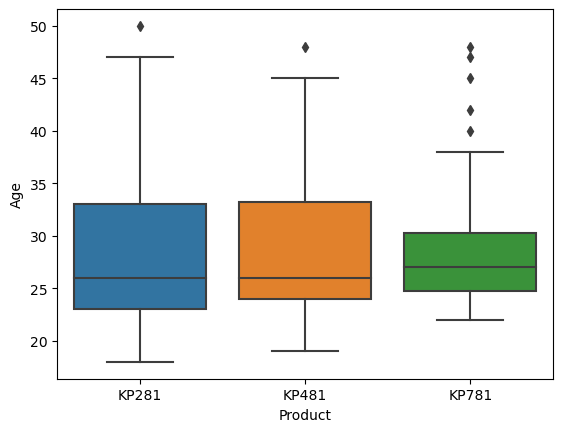

In [34]:
sns.boxplot(data=df,x='Product',y='Age',orient='v')

It can be clearly seen from the above plot that the median age of the people who bought KP281 and KP481 lies around 27 and the median of the age of people who have bought KP781 is 28. The range of people who have bought KP281 is more compared to other 2 products.

##### Influence of Age and Gender on the Product Bought

<Axes: xlabel='Product', ylabel='Age'>

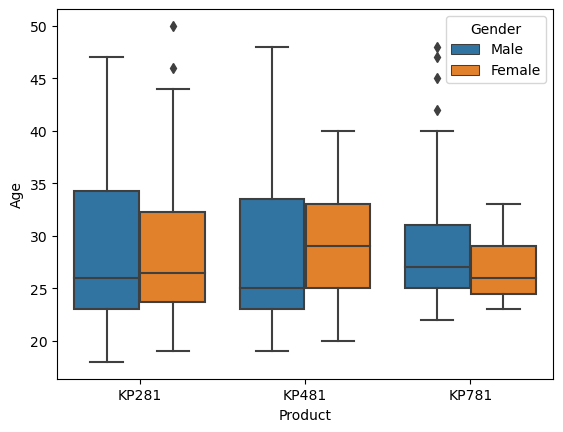

In [35]:
sns.boxplot(data=df,x='Product',y='Age',hue='Gender')

The median age of Male who bought KP281 is about 26 years whereas the median age of a women who bought KP281 is slightly greater than that of males by the value of 0.5.

The median age of women who bought KP481 is significantly higher than that of the median age of men who bought KP481.

The median age of women who bought KP481 is around 30 years and is higher than that of the median age of women who have bought KP281 and KP781.

##### Influence of Marital status

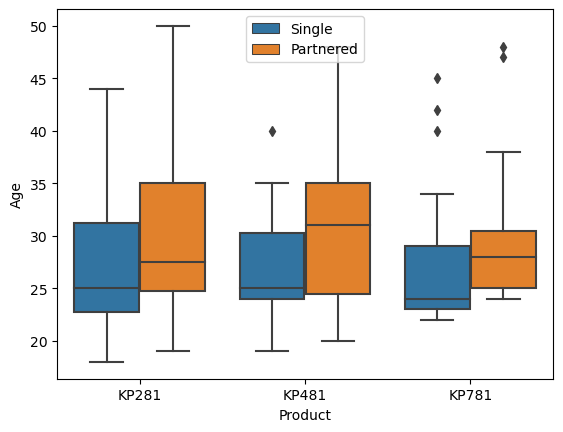

In [36]:
sns.boxplot(data=df,x='Product',y='Age',hue='MaritalStatus')
plt.legend(loc='upper center')

The number of married people who bought the products KP281 and KP481 is higher than that of single people who bought them. 

##### Influence of  Miles covered per each week

<Axes: xlabel='Product', ylabel='Miles'>

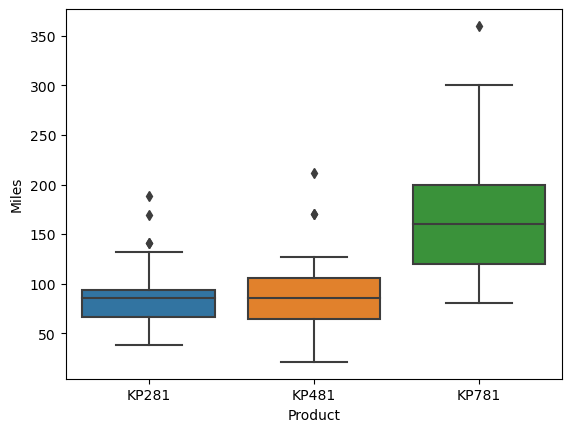

In [37]:
sns.boxplot(data=df,x='Product',y='Miles')

From the above boxplot, 
1. we can see that the Median of the **Miles** covered by using **KP281** is about 90.
2. The Median of the **Miles** covered by using **KP481** is also about 90.
3. The Median od the **Miles** covered by using **KP781** is around 170 miles.

Thus people who generally walk more (ie: more than 120 miles) tends to use KP781 product over the other products.

##### Influence of  Education

<Axes: xlabel='Product', ylabel='Education'>

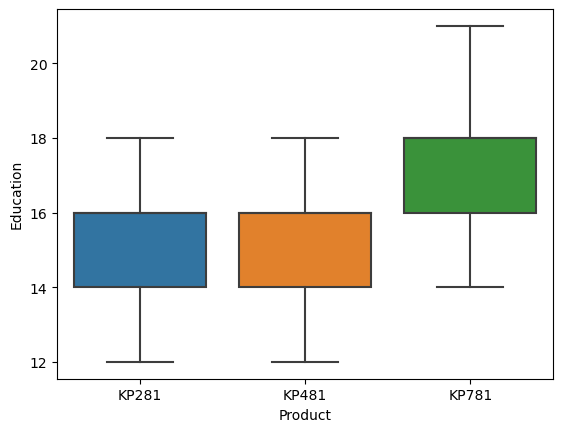

In [38]:
sns.boxplot(data=df,x='Product',y='Education')

From the above plot, we can see that the people who tend to have higher education qualification (ie: People who have the average years of education between 14 and 21) buy **KP781** product.

People who have an average years of education between 12 to 18 years, tend to buy either **KP281** or **KP481**.

##### Influence of Usage

<Axes: xlabel='Product', ylabel='Usage'>

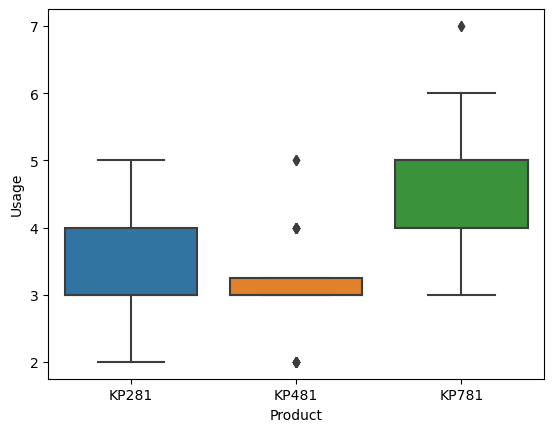

In [39]:
sns.boxplot(data=df,x='Product',y='Usage')

From the above we can infer that most of the people who have bought **KP281** uses it 3 to 4 times in a week. People who have bought **KP481** uses it 3 times in a week. Whereas, people who have bought **KP781** uses it 4 to 5 times in a week.

##### Fitness and Product

In [40]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='Fitness', ylabel='count'>

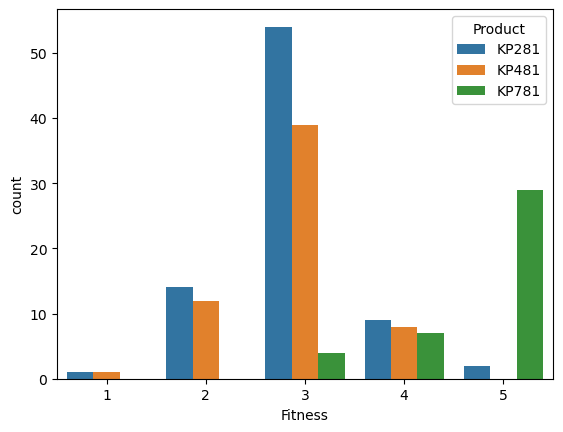

In [41]:
sns.countplot(data=df,x='Fitness',hue='Product')

From the countplot above we can infer that the most number of people who are extremely fit (say fitness level is 5) uses **KP781** type Treadmill.

Majority of the people who are averagely fit (say fitness level as 3) uses **KP281** type of Treadmill.

##### Distribution of Salary/ Income

<Axes: xlabel='Income', ylabel='Count'>

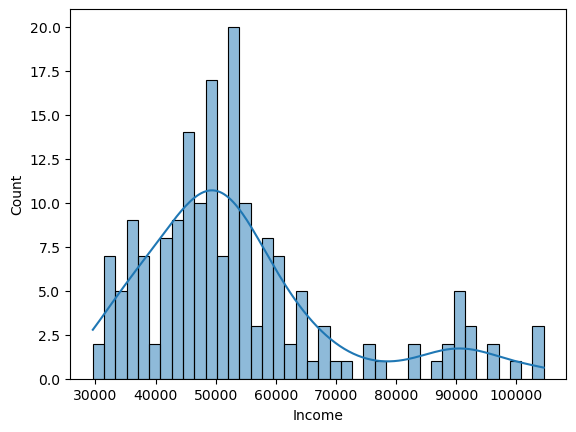

In [42]:
sns.histplot(df['Income'],bins=40,kde=True)

<Axes: >

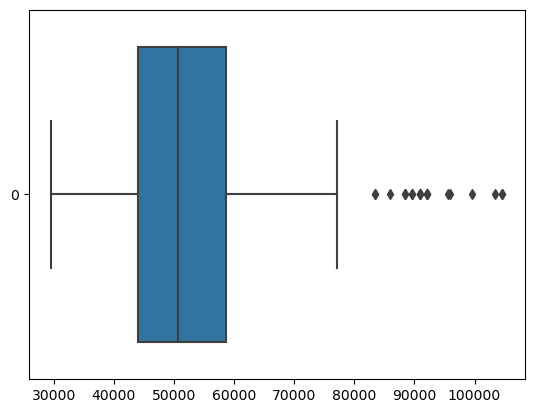

In [43]:
sns.boxplot(df['Income'],orient='h')

The Median Salary/ Income is about 50000 dollars and there are some outliers in the data with the income value greater than 78000 dollars.

In [44]:
print(df['Income'].min(),df['Income'].max())

29562 104581


So, let us partition the Income data into 3 different categories namely **Low Pay**, **Normal Pay** and **High Pay**.

Lets consider **30,000 to 50,000** dollars as Low pay, **50,000 to 70,000** dollars as Normal pay and anything higher than **70000** dollars as high pay.

In [45]:
df2=df.copy()

In [46]:
#we can use pd.cut() to do this operation.
labels = ['Low Pay','Normal Pay','High Pay']
categs = [df['Income'].min()-1,50000,70000,df['Income'].max()+1]
df['PayType'] = pd.cut(df['Income'],bins=categs,labels=labels)

In [47]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,PayType
0,KP281,18,Male,14,Single,3,4,29562,112,Low Pay
1,KP281,19,Male,15,Single,2,3,31836,75,Low Pay
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Pay
3,KP281,19,Male,12,Single,3,3,32973,85,Low Pay
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low Pay


Lets see the impact of this PayType on the sales of these 3 products

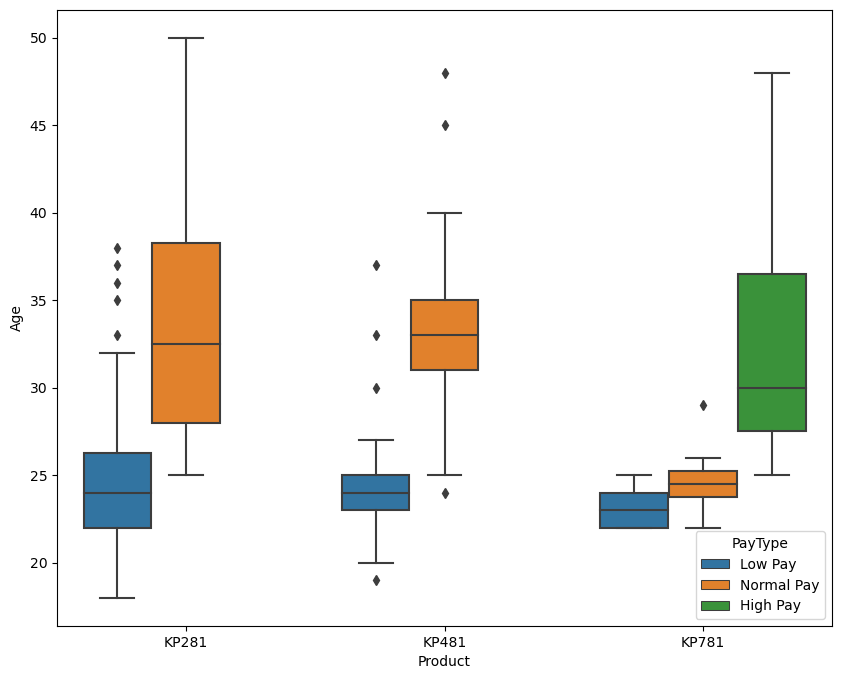

In [48]:
plt.figure(figsize = (10,8))
sns.boxplot(data=df,x='Product',y='Age',hue='PayType')
plt.show()

From the above boxplot we can clearly say that product **KP781** is preferred most by the people who are in the category of High Pay.
ie: Their income is greater than or equal to 70000 dollars. The median of age of people in that category is around 30.

Most of the People with normal or lower salary prefers **KP281** product and their median ages are around 32 and 24 respectively.

People who earns more would be of age 30 as it always takes time to land up in a high paying job and they are also the people who buy KP781.

##### Median salaries of people who bought different products

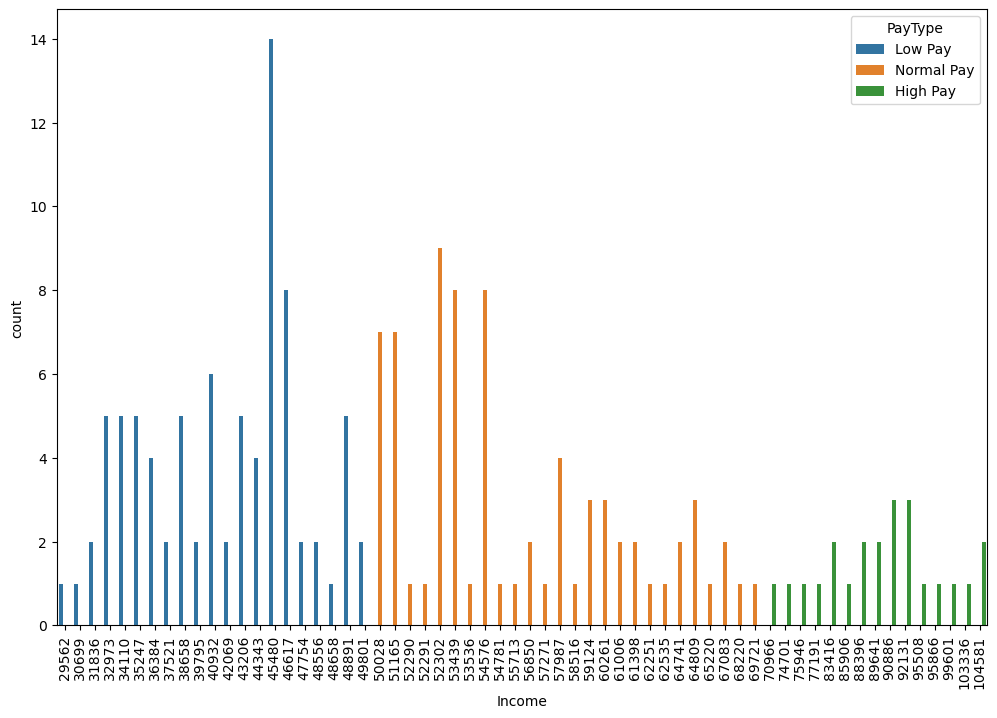

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Income',hue='PayType')
plt.xticks(rotation = 90)
plt.show()

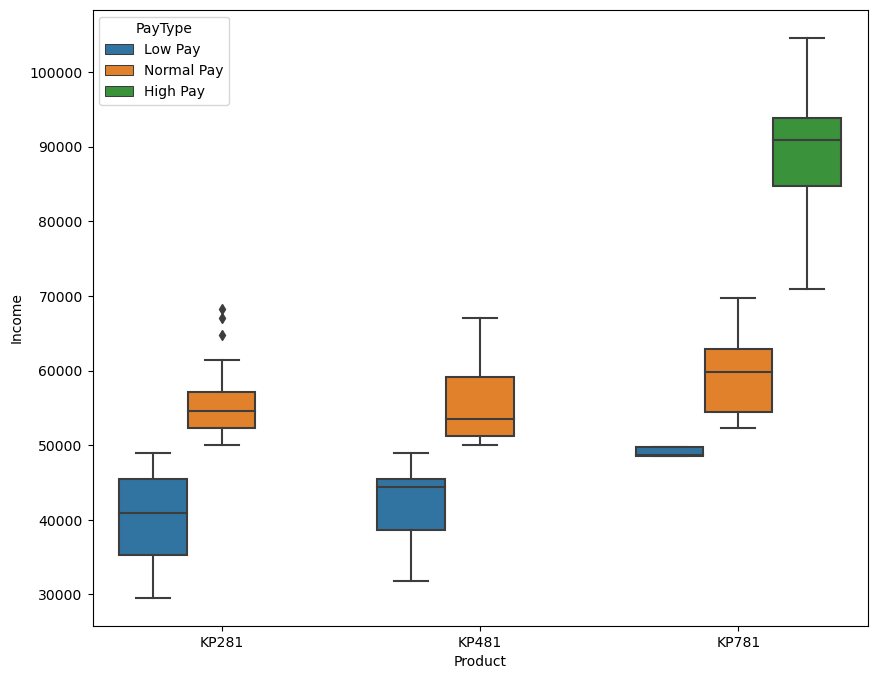

In [50]:
plt.figure(figsize = (10,8))
sns.boxplot(data=df,x='Product',y='Income',hue='PayType')
plt.show()

From the above plot,
The Median salary of the Low Pay Type people who bought **KP281** is little more than 40000 dollars.
The Median salary of the Normal Pay Type people who bought **KP281** is around 55000 dollars

The Median salary of the Low Pay Type people who bought **KP481** is around 45000 dollars
The Median salary of the Normal Pay Type people who bought **KP481** is little less than 55000 dollars

The Median salary of the Low Pay Type people who bought **KP781** is 50000 dollars
The Median salary of the Normal Pay Type people who bought **KP781** is little less than 60000 dollars. Whereas
The Median salary of the High Pay Type people who bought **KP781** is around 90000 dollars.
<br></br>
<br></br>
**Insight:::** People who earns exceptionally high tends to buy the Costly **KP781** as it becomes affordable for them. 

##### Distribution of Miles per week.

In [51]:
df.head()   #We can also segregate the members based on the number of miles covered in a week

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,PayType
0,KP281,18,Male,14,Single,3,4,29562,112,Low Pay
1,KP281,19,Male,15,Single,2,3,31836,75,Low Pay
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Pay
3,KP281,19,Male,12,Single,3,3,32973,85,Low Pay
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low Pay


<Axes: xlabel='Miles', ylabel='Count'>

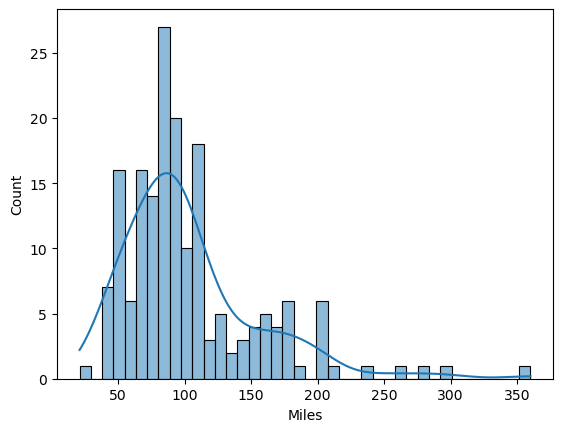

In [52]:
sns.histplot(df['Miles'],bins=40,kde=True)

We can categorize the members based on the Miles covered by them per week.

In [53]:
mile_vals = [20,135,248,361]
mile_labels = ['short_distance','normal_distance','long_distance']
df['Distance_Type'] = pd.cut(df['Miles'],labels=mile_labels,bins=mile_vals)

In [54]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,PayType,Distance_Type
0,KP281,18,Male,14,Single,3,4,29562,112,Low Pay,short_distance
1,KP281,19,Male,15,Single,2,3,31836,75,Low Pay,short_distance
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Pay,short_distance
3,KP281,19,Male,12,Single,3,3,32973,85,Low Pay,short_distance
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low Pay,short_distance


From this we can see the average miles covered using each of the different Treadmils.

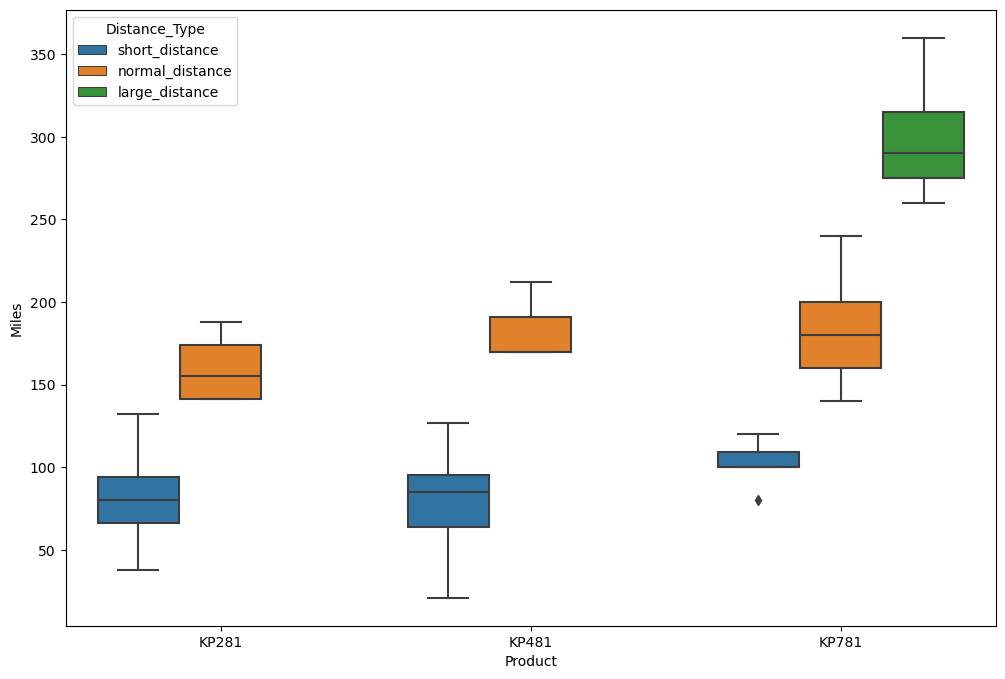

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Product',y='Miles',hue='Distance_Type')
plt.show()

**Insight:::** People who owns **KP781** product tends to walk more than 120 miles weekly.

### Check of correlation of different  factors.

In [56]:
num_cols   #We will find the correlation between these numerical columns alone.

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

<Figure size 1200x800 with 0 Axes>

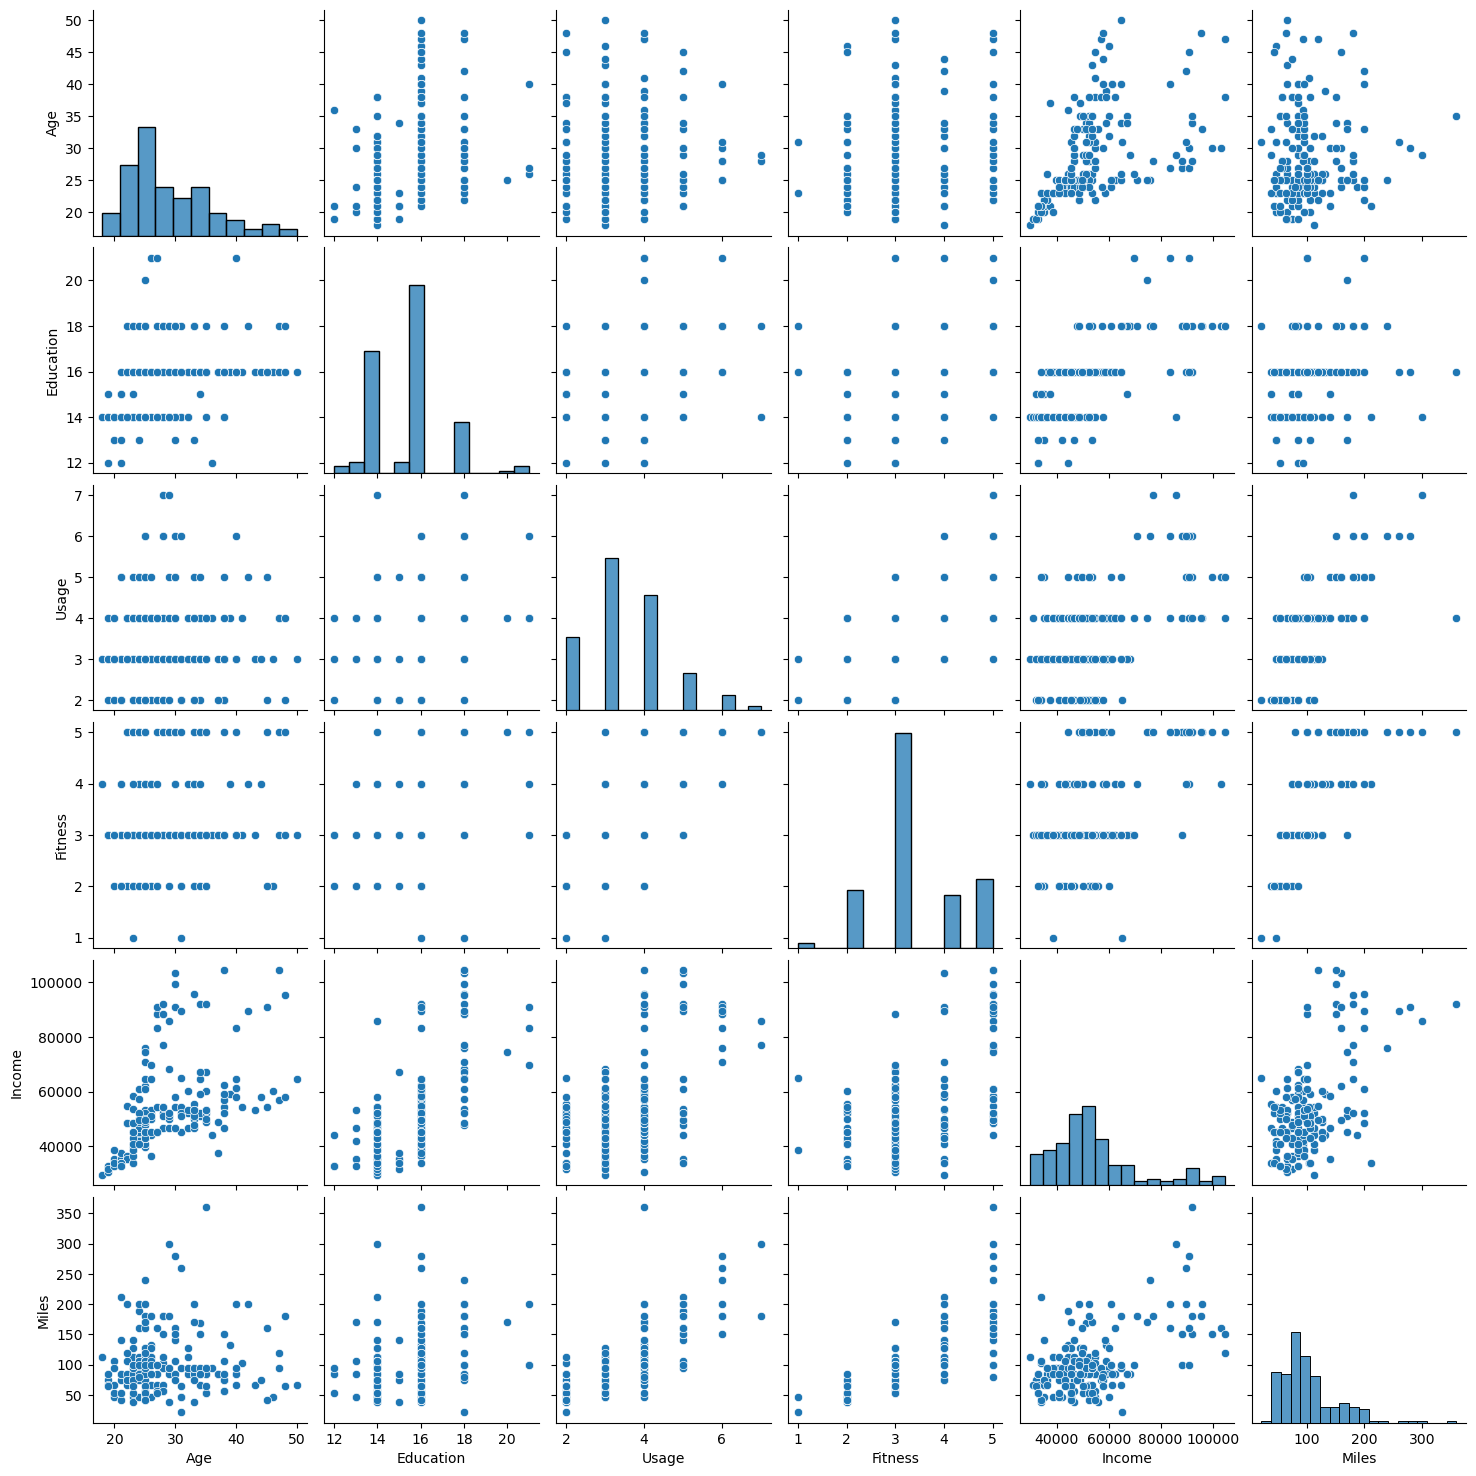

In [57]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df)
plt.show()

From the above we can see that there are many features in the dataset that are directly and positively correlated with each other. 
<br></br>
For Example: **Fitness** and **Miles**. From the plot we can observe that the fitness level of a particular person is high if he walks/runs more number of miles per week

<Axes: xlabel='Fitness', ylabel='Miles'>

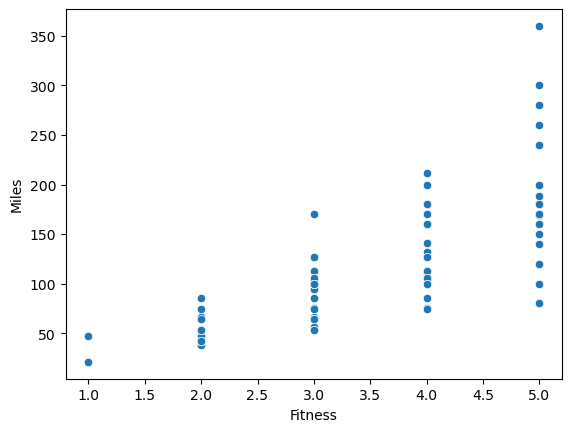

In [59]:
sns.scatterplot(data=df,x='Fitness',y='Miles')

Similarly the feature **Fitness** is also positively correlated with the **Usage** feature. It can be concluded saying that the fitness levels are high for those people who tends to use Treadmil frequently in a week.

<Axes: xlabel='Fitness', ylabel='Usage'>

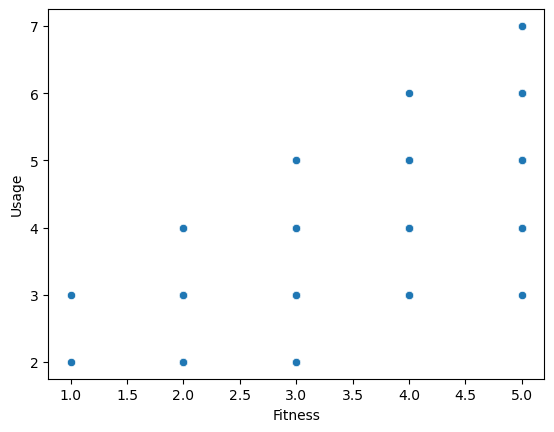

In [60]:
sns.scatterplot(data=df,x='Fitness',y='Usage')

*The total number of miles covered by each person per week tends to be high if their frequency of usage of treadmill per week is high.*

<Axes: xlabel='Usage', ylabel='Miles'>

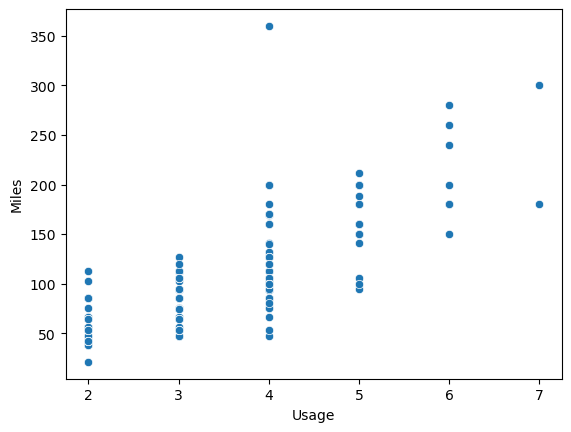

In [61]:
sns.scatterplot(data=df,x='Usage',y='Miles')

##### Conditional and Marginal Probabilities for the dataset

In [62]:
df.head()  #head of the dataset.

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,PayType,Distance_Type
0,KP281,18,Male,14,Single,3,4,29562,112,Low Pay,short_distance
1,KP281,19,Male,15,Single,2,3,31836,75,Low Pay,short_distance
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Pay,short_distance
3,KP281,19,Male,12,Single,3,3,32973,85,Low Pay,short_distance
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low Pay,short_distance


###### Marginal Probability of the people buying different products

In [63]:
len(df)

180

*The total number of records in the dataset is 180.*

In [64]:
pd.crosstab(df['Product'],df['Product'],margins=True,normalize=True,margins_name='Marginal_Probability')

Product,KP281,KP481,KP781,Marginal_Probability
Product,,,,
KP281,0.444444,0.000000,0.000000,0.444444
KP481,0.000000,0.333333,0.000000,0.333333
KP781,0.000000,0.000000,0.222222,0.222222
Marginal_Probability,0.444444,0.333333,0.222222,1.000000


*We have to pass **Normalize** as True to the function inorder to get the Probabilities in each cell of the Cross-Tabulated table.*

In [65]:
pd.crosstab(df['Product'],df['Product'],margins=True,normalize=True,margins_name='Marginal_Probability')['Marginal_Probability']  #Extracting the Marginal Probabilities alone from the crosstab.

Product
KP281                   0.444444
KP481                   0.333333
KP781                   0.222222
Marginal_Probability    1.000000
Name: Marginal_Probability, dtype: float64

From the above we can see the Probabilities of the customer who have bought different products. 

1. The Marginal probability of people buying **KP281** is 0.445
2. The Marginal probability of people buying **KP481** is 0.334
3. The Marginal probability of people buying **KP781** is 0.223


A little less than 50% of the people tend to buy **KP281** and it is the most sold product from Aerofit. It is the cheapest product from Aerofit and people find it more affordable to buy one.

Actionable item: Some changes can be done in other 2 products in varies areas like features, pricing which attracts customers.

#### Marginal probabilities of 2 Genders who bought different products

In [66]:
pd.crosstab(index=df['Gender'],columns=df['Gender'],margins=True,normalize=True,margins_name='Marginal probability')

Gender,Female,Male,Marginal probability
Gender,,,
Female,0.422222,0.000000,0.422222
Male,0.000000,0.577778,0.577778
Marginal probability,0.422222,0.577778,1.000000


So the probability of a **Female** buying the product is **0.4223** and the probability of **Male** buying the product is **0.5778**.

### To find the probabilities of different Gender buying the available different products.

*To compute this we have to pass **Product** and **Gender** series to the pd.crosstab function.*

In [67]:
pd.crosstab(df['Product'],df['Gender'],normalize=True)

Gender,Female,Male
Product,,
KP281,0.222222,0.222222
KP481,0.161111,0.172222
KP781,0.038889,0.183333


From the above grid we can conclude the following:

* The conditional probability of a Female buying the product **KP281** is **0.222**
* The condition probability of a Male buying the product **KP281** is **0.222**
<br></br>
* The condition probability of a Male buying the product **KP481** is **0.17222**
* The condition probability of a Female buying the product **KP481** is **0.16111**
<br></br>
* The condition probability of a Male buying the product **KP781** is **0.18333**
* The condition probability of a Female buying the product **KP781** is **0.038889**
<br></br>
Both Male and Female are equally probable to buy **KP281** product. For the other products probability of Male's buying them is slightly higher than that of Female's buying them.

#### Marginal Probability of different Marital Status

In [68]:
pd.crosstab(df['MaritalStatus'],df['MaritalStatus'],normalize=True,margins=True)['All']

MaritalStatus
Partnered    0.594444
Single       0.405556
All          1.000000
Name: All, dtype: float64

* The Probability of a **Single** person buying a product is 0.4055
* The Probability of a **Married/ Partnered** person buying a product is 0.5945

#### Conditional Probability of different Marital Status on buying the product

In [69]:
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],normalize=True)

MaritalStatus,Partnered,Single
Product,,
KP281,0.266667,0.177778
KP481,0.200000,0.133333
KP781,0.127778,0.094444


From the above grid, we can infer that

* The probability of **Partnered** people buying **KP281** product is 0.26667
* The probability of **Single** people buying **KP281** product is 0.1778
<br></br>
* The probability of **Partnered** people buying **KP481** product is 0.2
* The probability of **Single** people buying **KP481** product is 0.1333
<br></br>
* The probability of **Partnered** people buying **KP781** product is 0.12778
* The probability of **Single** people buying **KP781** product is 0.09445
<br></br>
The probability of Partnered people buying any of the Aerofit's product is greater than that of Single people.

In [70]:
#To the same analysis for PayType and DistanceType categorical features
#Later start the same with other features like Age, Fitness and Usage

#### Marginal Probability of different PayType

In [71]:
pd.crosstab(index=df['PayType'],columns=df['Product'],margins=True,margins_name='Marginal_Probability',normalize=True)['Marginal_Probability']

PayType
Low Pay                 0.461111
Normal Pay              0.411111
High Pay                0.127778
Marginal_Probability    1.000000
Name: Marginal_Probability, dtype: float64

From the above grid, we can say that,

* The marginal probability of people buying any of the product with **Low salary** is 0.46112
* The marginal probability of people buying any of the product with **Medium salary** is 0.4111
* The marginal probability of people buying any of the product with **High salary** is 0.12778

<br>
About 50% of the people in the population have their salary categorized as "Low Salary" and about 41% of the people have their salary categorized as "Medium Salary".

##### Conditional Probability of different pay types on buying the product.

In [72]:
pd.crosstab(index=df['Product'],columns=df['PayType'],normalize=True)

PayType,Low Pay,Normal Pay,High Pay
Product,,,
KP281,0.266667,0.177778,0.000000
KP481,0.166667,0.166667,0.000000
KP781,0.027778,0.066667,0.127778


From the above grid, we can infer that

* The probability of people buying **KP281** product with Low salary pay type is **0.2667**
* The probability of people buying **KP281** product with Normal salary pay type is **0.1778**
* The probability of people buying **KP281** product with High salary pay type is **0.000**
<br></br>
* The probability of people buying **KP481** product with Low salary pay type is **0.1667**
* The probability of people buying **KP481** product with Normal salary pay type is **0.1667**
* The probability of people buying **KP481** product with High salary pay type is **0.000**
<br></br>
* The probability of people buying **KP781** product with Low salary pay type is **0.02778**
* The probability of people buying **KP781** product with Normal salary pay type is **0.06667**
* The probability of people buying **KP781** product with High salary pay type is **0.12778**
<br></br>
<br></br>
From the above we can see that the people who are earning way higher have zero probability in buying the product KP281 and KP481. 
<br></br>
Probability of people buying KP481 with salary categorized as Low and Normal are equal. They have the probability of 0.1667.

#### Marginal probability of different distance types covered

In [73]:
pd.crosstab(index=df['Distance_Type'],columns=df['Product'],normalize=True,margins=True,margins_name='Marginal_probability')['Marginal_probability']

Distance_Type
short_distance          0.805556
normal_distance         0.172222
large_distance          0.022222
Marginal_probability    1.000000
Name: Marginal_probability, dtype: float64

From the above, we can say that 

* The marginal probability of the people covering **short distance** is **0.8056**
* The marginal probability of the people covering **normal distance** is **0.17222**
* The marginal probability of the people covering **long distance** is **0.0223**

About 80% of the people in the population tends to cover only short distance (less than 130 miles) in a week.

##### Conditional probability of people buying different products based on the type of difference they cover.

In [74]:
pd.crosstab(index=df['Product'],columns=df['Distance_Type'],normalize=True)

Distance_Type,short_distance,normal_distance,large_distance
Product,,,
KP281,0.422222,0.022222,0.000000
KP481,0.316667,0.016667,0.000000
KP781,0.066667,0.133333,0.022222


From the above grid, we can say that

* The probability of people buying **KP281** who covers **short distance** in walking is **0.4223**
* The probability of people buying **KP281** who covers **normal_distance** in walking is **0.0222**
* The probability of people buying **KP281** who covers **long distance** in walking is **0.000**
<br></br>
* The probability of people buying **KP481** who covers **short distance** in walking is **0.31667**
* The probability of people buying **KP481** who covers **normal_distance** in walking is **0.01667**
* The probability of people buying **KP481** who covers **long distance** in walking is **0.000**
<br></br>
* The probability of people buying **KP781** who covers **short distance** in walking is **0.0667**
* The probability of people buying **KP781** who covers **normal_distance** in walking is **0.1333**
* The probability of people buying **KP781** who covers **long distance** in walking is **0.0222**

<br></br>
People who tends to walk a long distance prefers to buy the product **KP781** with the probability of **0.0222**

#### Marginal probabilities of people of certain age buying products.

In [75]:
pd.crosstab(index=df['Age'],columns=df['Product'],normalize=True,margins=True)['All']

Age
18     0.005556
19     0.022222
20     0.027778
21     0.038889
22     0.038889
23     0.100000
24     0.066667
25     0.138889
26     0.066667
27     0.038889
28     0.050000
29     0.033333
30     0.038889
31     0.033333
32     0.022222
33     0.044444
34     0.033333
35     0.044444
36     0.005556
37     0.011111
38     0.038889
39     0.005556
40     0.027778
41     0.005556
42     0.005556
43     0.005556
44     0.005556
45     0.011111
46     0.005556
47     0.011111
48     0.011111
50     0.005556
All    1.000000
Name: All, dtype: float64

From the above we can see the probabilities of different age people buying a product from Aero-fit.

**Lets categorize the people based on age**

In [76]:
age_labels = ['Young_adults','Adults','Aged adults']
age_vals = [17,27,35,43]
df['Age_kind'] = pd.cut(df['Age'],bins=age_vals,labels=age_labels)

In [77]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,PayType,Distance_Type,Age_kind
0,KP281,18,Male,14,Single,3,4,29562,112,Low Pay,short_distance,Young_adults
1,KP281,19,Male,15,Single,2,3,31836,75,Low Pay,short_distance,Young_adults
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Pay,short_distance,Young_adults
3,KP281,19,Male,12,Single,3,3,32973,85,Low Pay,short_distance,Young_adults
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low Pay,short_distance,Young_adults


Now we have 3 different Age categories and we can see the probability of each category in buying the product from Aero-fit.

In [78]:
pd.crosstab(index=df['Age_kind'],columns=df['Product'],normalize=True,margins=True)['All']

Age_kind
Young_adults    0.573099
Adults          0.315789
Aged adults     0.111111
All             1.000000
Name: All, dtype: float64

From the above we can say that,

* The probability of **Young adults** buying the product from Aero-fit is **0.5730**
* The probability of **Adults** buying the product from Aero-fit is **0.3157**
* The probability of **Aged adults** buying the product is **0.1112**

##### Conditional property for different age group people buying different type of products.

In [79]:
pd.crosstab(index=df['Product'],columns=df['Age_kind'],normalize=True)

Age_kind,Young_adults,Adults,Aged adults
Product,,,
KP281,0.257310,0.128655,0.058480
KP481,0.187135,0.116959,0.035088
KP781,0.128655,0.070175,0.017544


From the above, we can say that

* The probability of **Young adults** buying **KP281** is **0.2573**
* The probability of **Adults** buying **KP281** is **0.1286**
* The probability of **Aged Adults** buying **KP281** is **0.0584**
<br></br>
* The probability of **Young adults** buying **KP481** is **0.1871**
* The probability of **Adults** buying **KP481** is **0.1169**
* The probability of **Aged Adults** buying **KP481** is **0.0350**
<br></br>
* The probability of **Young adults** buying **KP781** is **0.1286**
* The probability of **Adults** buying **KP781** is **0.0701**
* The probability of **Aged Adults** buying **KP781** is **0.0175**

##### Marginal Probabilities of different fitness levels

In [80]:
pd.crosstab(df['Fitness'],columns=df['Product'],normalize=True,margins=True)['All']

Fitness
1      0.011111
2      0.144444
3      0.538889
4      0.133333
5      0.172222
All    1.000000
Name: All, dtype: float64

From the above we can see that,

* The probability of people with fitness level as 1 is **0.0111**
* The probability of people with fitness level as 2 is **0.1444**
* The probability of people with fitness level as 3 is **0.53889**
* The probability of people with fitness level as 4 is **0.1334**
* The probability of people with fitness level as 5 is **0.17223**

##### The conditional probabilties of fitness level of the people based on the product they bought:

In [81]:
pd.crosstab(df['Product'],df['Fitness'],normalize=True)

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.005556,0.077778,0.300000,0.050000,0.011111
KP481,0.005556,0.066667,0.216667,0.044444,0.000000
KP781,0.000000,0.000000,0.022222,0.038889,0.161111


From the above grid, we can say that

* The probability of people with fitness level **1** and buying the product **KP281** is **0.005566**
* The probability of people with fitness level **2** and buying the product **KP281** is **0.0778**
* The probability of people with fitness level **3** and buying the product **KP281** is **0.300**
* The probability of people with fitness level **4** and buying the product **KP281** is **0.050**
* The probability of people with fitness level **5** and buying the product **KP281** is **0.0111**
<br></br>
* The probability of people with fitness level **1** and buying the product **KP481** is **0.005566**
* The probability of people with fitness level **2** and buying the product **KP481** is **0.0666**
* The probability of people with fitness level **3** and buying the product **KP481** is **0.21667**
* The probability of people with fitness level **4** and buying the product **KP481** is **0.0444**
* The probability of people with fitness level **5** and buying the product **KP481** is **0.00**
<br></br>
* The probability of people with fitness level **1** and buying the product **KP781** is **0.00000**
* The probability of people with fitness level **2** and buying the product **KP781** is **0.00000**
* The probability of people with fitness level **3** and buying the product **KP781** is **0.02222**
* The probability of people with fitness level **4** and buying the product **KP781** is **0.038889**
* The probability of people with fitness level **5** and buying the product **KP781** is **0.16111**

##### Marginal probabilities of people's usage levels

In [82]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,PayType,Distance_Type,Age_kind
0,KP281,18,Male,14,Single,3,4,29562,112,Low Pay,short_distance,Young_adults
1,KP281,19,Male,15,Single,2,3,31836,75,Low Pay,short_distance,Young_adults
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Pay,short_distance,Young_adults
3,KP281,19,Male,12,Single,3,3,32973,85,Low Pay,short_distance,Young_adults
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low Pay,short_distance,Young_adults


In [83]:
pd.crosstab(df['Usage'],df['Product'],normalize=True,margins=True)['All']

Usage
2      0.183333
3      0.383333
4      0.288889
5      0.094444
6      0.038889
7      0.011111
All    1.000000
Name: All, dtype: float64

From the above we can see that,

* The probability of people using the product **Twice** in a week is **0.1834**
* The probability of people using the product **Thrice** in a week is **0.3834**
* The probability of people using the product **Four times** in a week is **0.2889**
* The probability of people using the product **Five times** in a week is **0.0944**
* The probability of people using the product **Six times** in a week is **0.03889**
* The probability of people using the product **Seven times** in a week is **0.0112**
<br></br>
Most number of people tends to use any of the product from Aerofit thrice in the week

##### Conditional probability of people's usage based on different product's.

In [84]:
pd.crosstab(df['Product'],df['Usage'],normalize=True)

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111


From the above grid,

* The probability of people using **KP281** 2 times in a week is **0.10556**
* The probability of people using **KP481** 2 times in a week is **0.0778**
* The probability of people using **KP781** 2 times in a week is **0.000**
<br></br>
* The probability of people using **KP281** 3 times in a week is **0.20556**
* The probability of people using **KP481** 3 times in a week is **0.17222**
* The probability of people using **KP781** 3 times in a week is **0.0056**
<br></br>
* The probability of people using **KP281** 4 times in a week is **0.1222**
* The probability of people using **KP481** 4 times in a week is **0.06667**
* The probability of people using **KP781** 4 times in a week is **0.01667**
<br></br>
* The probability of people using **KP281** 5 times in a week is **0.0111**
* The probability of people using **KP481** 5 times in a week is **0.01667**
* The probability of people using **KP781** 5 times in a week is **0.0667**
<br></br>
* The probability of people using **KP281** 6 times in a week is **0.000**
* The probability of people using **KP481** 6 times in a week is **0.000**
* The probability of people using **KP781** 6 times in a week is **0.03889**
<br></br>
* The probability of people using **KP281** 7 times in a week is **0.000**
* The probability of people using **KP481** 7 times in a week is **0.000**
* The probability of people using **KP781** 7 times in a week is **0.0111**

* Most of the people who own **KP781** uses the product mostly for 6 times in a week. And the people who own **KP281** or **KP481** uses the product 3 times in a week.